# Algoritmo de verificación de la zona de la placa

En primer lugar se importan todos los paquetes y módulos necesarios

In [16]:
import cv2 
import matplotlib.pyplot as plt 

Se lee la imagen y se pasa a escala de grises

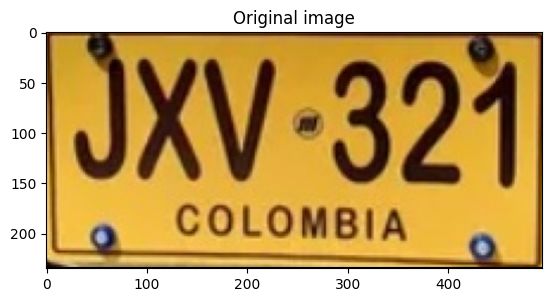

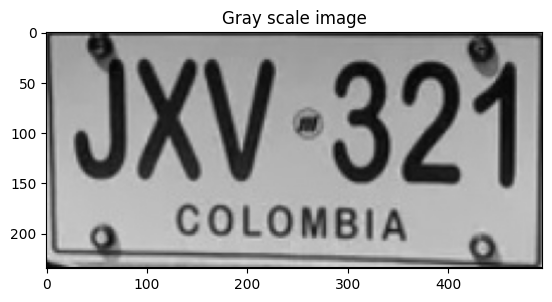

In [17]:
plate_zone = cv2.imread('Fig/plate_zone.png', cv2.IMREAD_COLOR)
plate_zone_gray = cv2.cvtColor(plate_zone, cv2.COLOR_BGR2GRAY)
plt.title("Original image")
plt.imshow(cv2.cvtColor(plate_zone, cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Gray scale image")
plt.imshow(cv2.cvtColor(plate_zone_gray, cv2.COLOR_BGR2RGB))
plt.show()

Se aplica una umbralización binaria

In [7]:
plate_zone_binary = cv2.threshold(plate_zone_gray, 127, 255, cv2.THRESH_BINARY)[1]

Se toma la altura y el ancho de la imagen y se realizan las primeras verificaciones.
* Altura de la imagen mínimo 10 pixeles
* Ancho de la imagen mínimo 50 pixeles
* Razón entre la altura y el ancho mayor a 0.2

In [8]:
h_plate, w_plate  = plate_zone_binary.shape
    
min_height = 10
bool_h = h_plate > min_height

min_width = 50
bool_w = w_plate > min_width

height_width_relation = (h_plate / w_plate) * 100
bool_h_w = height_width_relation > 20 

Seguido de esto se obtiene el número de contornos que se encuentran en la imagen. Al ser una placa, debería tener muchos contornos debido a la presencia de los caracteres (letras y números de la placa).
* Número de contornos mayor a 10

In [9]:
plate_contours = cv2.findContours(plate_zone_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]  
bool_contours = len(plate_contours) > 10

Por otro lado, se realiza un histograma de la imagen binarizada con el fin de calcular el número de pixeles blancos y negros.
* Diferencia entre pixeles blancos y negros debe ser mayor a 0.

Esto debido a que en la placa se debería tener más pixeles blancos (correspondientes al fondo) que pixeles negros (correspondientes a los caracteres).

In [10]:
hist = cv2.calcHist([plate_zone_binary],[0],None,[256],[0,256])
white_pixels = hist[-1]
black_pixels = hist[0]
black_white_factor = 0

bool_white_black = (white_pixels - black_pixels) > black_white_factor

El resultado del proceso de verificación se representa entonces mediante el uso de un booleano, *plate_found*, que representa si la imagen de entrada corresponde o no a una placa. El valor de este booleano corresponde al resultado de la operación AND de cada una de las 5 condiciones previamente explicadas.

In [13]:
plate_found = bool_h and bool_w and bool_h_w and bool_contours and  bool_white_black
print(f"Plate was found: {plate_found}")

Plate was found: [ True]


Adicionalmente este proceso de verificación imprime el resultado de las diferentes condiciones y características relevantes de la imagen:

In [14]:
info = ""
info += f"Plate Zone Image\nHeight: {h_plate}, Width: {w_plate}, Area: {h_plate*w_plate}\n"
info += f"Height of plate is greater than {min_height}: {bool_h}\n"
info += f"Width of plate is greater than {min_width}: {bool_w}\n"
info += f"Height and width relation is {round(height_width_relation, 2)}. Valid plate: {bool_h_w}\n"
info += f"Found contours: {len(plate_contours)}\n"
info += f"Number of contours is greater than 10: {bool_contours}"
info += f"Binary Image...\nWhite pixels: {white_pixels} Black pixels: {black_pixels}\n"
info += f"White-Black-Difference is greater than {black_white_factor}: {bool_white_black}, {white_pixels - black_pixels}\n"

print(info)

Plate Zone Image
Height: 235, Width: 494, Area: 116090
Height of plate is greater than 10: True
Width of plate is greater than 50: True
Height and width relation is 47.57. Valid plate: True
Found contours: 32
Number of contours is greater than 10: TrueBinary Image...
White pixels: [81821.] Black pixels: [34269.]
White-Black-Difference is greater than 0: [ True], [47552.]

